# VGG16

In [ ]:
import tensorflow as tf
import pandas as pd 
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

from tensorflow.keras import models, layers
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Flatten, Reshape, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Dense, Concatenate, Add, Reshape, Dot
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array

from keras.applications.vgg16 import VGG16

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS   = 3

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_path="/kaggle/input/tomato-leaf-disease/tomato_dataset/train"
valid_path="/kaggle/input/tomato-leaf-disease/tomato_dataset/valid"
test_path="/kaggle/input/tomato-leaf-disease/tomato_dataset/test"

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'categorical',
                                              shuffle=True)

valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                             shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                           shuffle=True)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [ ]:
base_model = keras.applications.VGG16(
    weights="imagenet",  
    input_shape=(256, 256, 3),
    include_top=False  
)  

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(256,256,3),
                                               include_top=False,
                                                weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False
    
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512,activation="relu")(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction = tf.keras.layers.Dense(10, activation='softmax')(x)

vgg16_model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='loss'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.75
                                            , min_lr=0.00001)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
vgg16_model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=["accuracy"]
)

epochs = 20



vgg16_history = vgg16_model.fit(train_set,
                                steps_per_epoch=len(train_set),  
                                validation_data=valid_set,
                                epochs=epochs,
                                callbacks=[learning_rate_reduction],
                                validation_steps=len(valid_set),
                                verbose=1,
                            )

Epoch 1/20
574/574 [==============================] - 335s 581ms/step - loss: 0.8205 - accuracy: 0.7260 - val_loss: 0.4705 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 2/20
574/574 [==============================] - 304s 530ms/step - loss: 0.5850 - accuracy: 0.8055 - val_loss: 0.4400 - val_accuracy: 0.8471 - lr: 0.0010
Epoch 3/20
574/574 [==============================] - 295s 513ms/step - loss: 0.4911 - accuracy: 0.8397 - val_loss: 0.4176 - val_accuracy: 0.8643 - lr: 0.0010
Epoch 4/20
574/574 [==============================] - 296s 515ms/step - loss: 0.4367 - accuracy: 0.8587 - val_loss: 0.3754 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 5/20
574/574 [==============================] - 298s 519ms/step - loss: 0.3902 - accuracy: 0.8768 - val_loss: 0.5865 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 6/20
574/574 [==============================] - 299s 522ms/step - loss: 0.3763 - accuracy: 0.8815 - val_loss: 0.3186 - val_accuracy: 0.9025 - lr: 0.0010
Epoch 7/20
574/574 [==========================

In [ ]:
scores1 = vgg16_model.evaluate(valid_set)
scores1

144/144 [==============================] - 15s 105ms/step - loss: 0.3790 - accuracy: 0.9261


[0.37897375226020813, 0.9260632395744324]

In [ ]:
scores2 = vgg16_model.evaluate(test_set)
scores2

2/2 [==============================] - 3s 2s/step - loss: 0.2372 - accuracy: 0.9400


[0.23724742233753204, 0.9399999976158142]

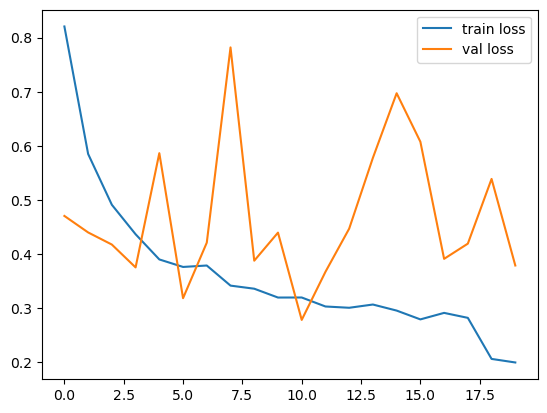

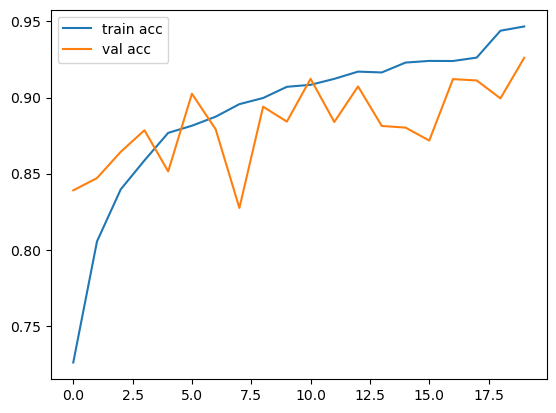

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.plot(vgg16_history.history['loss'], label='train loss')
plt.plot(vgg16_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(vgg16_history.history['accuracy'], label='train acc')
plt.plot(vgg16_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
class_names = list(train_set.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


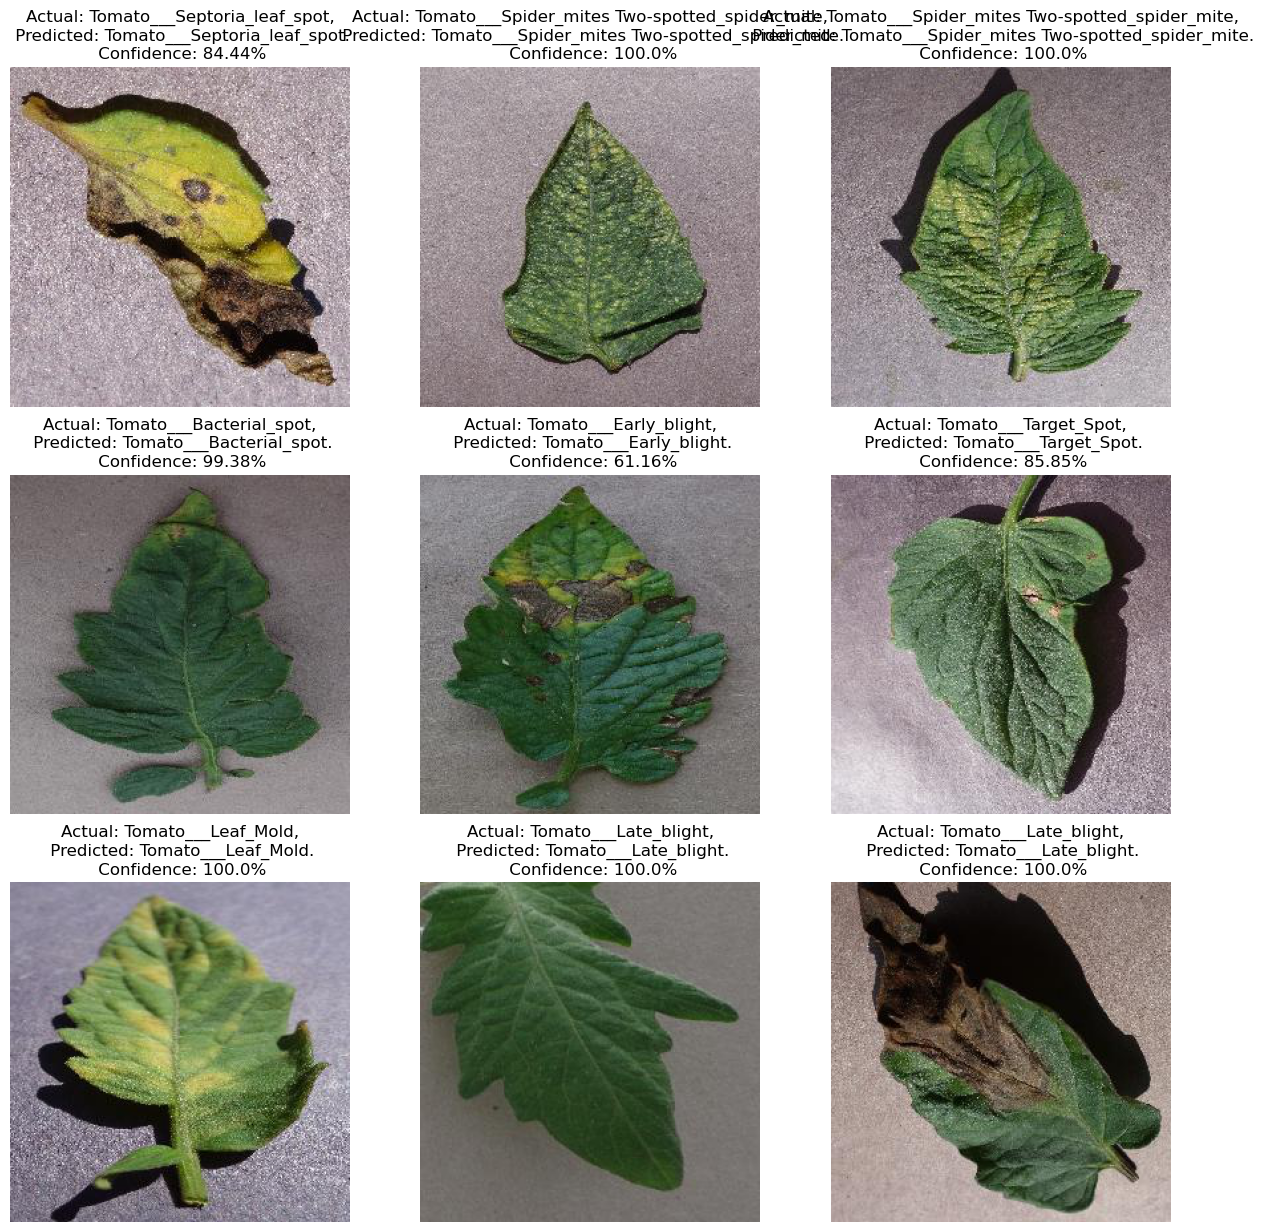

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(vgg16_model, images[i])
        index = labels[i].argmax(axis=0)
        actual_class = class_names[index] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break


In [ ]:
from sklearn.metrics import classification_report

x_val, y_val = valid_set.next()

y_pred = vgg16_model.predict(x_val).round()
target_names = [f"{class_names[i]}" for i in range(10)]
print(classification_report(y_val, y_pred, target_names=target_names))

1/1 [==============================] - 0s 49ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       1.00      1.00      1.00         3
                        Tomato___Early_blight       0.86      1.00      0.92         6
                         Tomato___Late_blight       1.00      0.75      0.86         4
                           Tomato___Leaf_Mold       1.00      1.00      1.00         4
                  Tomato___Septoria_leaf_spot       1.00      1.00      1.00         1
Tomato___Spider_mites Two-spotted_spider_mite       0.75      1.00      0.86         3
                         Tomato___Target_Spot       1.00      1.00      1.00         4
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      1.00      1.00         3
                 Tomato___Tomato_mosaic_virus       1.00      1.00      1.00         1
                             Tomato___healthy       1.00      0.67      0.80 

In [ ]:
vgg16_model.save('vgg16_model.h5')